# Exercises on PCA

## Exercise 1: Hand-written digits

The goal of the exercise is to perform PCA on a dataset containing hand-written digits. 
The dataset contains 1797 8x8 images of digits in the range 0-9.
How can PCA help in the recognition of different digits?

In the first cell we import the libraries that we are going to use and the digits dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits_images = load_digits().data  # images dataset size 1767x64
digits_labels = load_digits().target # images labels size 1767

print(digits_images.shape) #check the dimensions


(1797, 64)


We can also plot the digits, but first we need to reshape it in a 8x8 image.

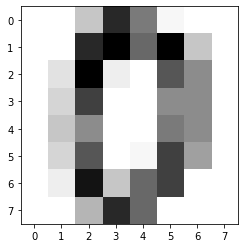

Image index: 0


In [104]:
# select the index of the digit to show
index = 0

# select the image and reshape it to show it
digit = digits_images[index,:].reshape(8,8)
plt.imshow(digit, cmap='Greys')
plt.xticks(np.linspace(0, 7, 8))
plt.yticks(np.linspace(0, 7, 8))
plt.show()

# print the label corresponding to the image
print(f'Image index: {digits_labels[index]}')


Now, we write a function to implement the PCA algorithm. Conventionally, the mean is removed from the dataset before applying PCA. If this is not done, the mean will be the first PC.

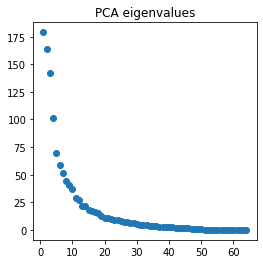

In [92]:
# define the PCA function

def PCA(X):
    X0 = X - np.mean(X, axis=0) # remove the mean from the dataset
    n = X.shape[0]  # number of samples
    S = 1/(n-1) * (X0.T @ X0) # compute the covariance matrix
    l, A = np.linalg.eig(S) # compute the eigenvalue decomposition
    i_sort = np.argsort(-l) # sort the eigenvalues in descending order
    l_sort = l[i_sort]
    A_sort = A[:,i_sort]

    Z = X @ A  # Compute the PC scores
    return A_sort, Z, l_sort

# apply the function to the datase
A, Z, l = PCA(digits_images)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(np.linspace(1, 64, 64), l)
ax.set_title('PCA eigenvalues')
plt.show()


Now, we can perform PCA using the scikit-learn package and plot the explained variance of the resulting PCs.

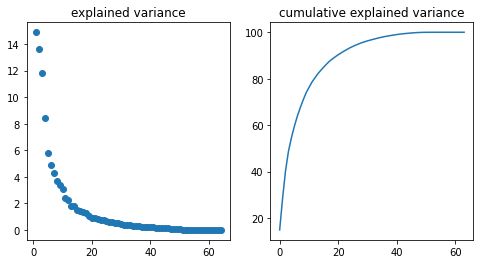

In [93]:
# We import the PCA object from the sklearn package
from sklearn.decomposition import PCA

pca = PCA(n_components=64) # we select all the features for now
pca.fit(digits_images)

# We use the attributes of PCA to find the explained variance in percentage
variance_ratio = pca.explained_variance_ratio_ * 100

fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(np.linspace(1, 64, 64), variance_ratio)
axs[0].set_title('explained variance')
axs[1].plot(np.cumsum(variance_ratio))
axs[1].set_title('cumulative explained variance')
plt.show()


We can also retrieve the PCs (A), and calculate the PC scores (Z).

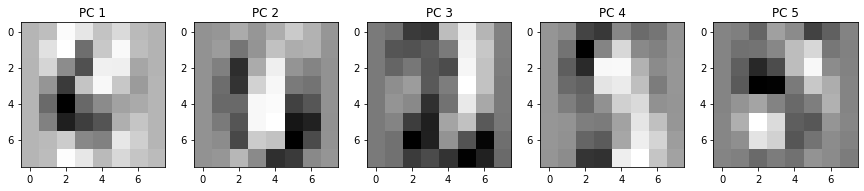

In [94]:
# We calculate the matrix A, which contains the directions of the PCs
A = pca.components_.T

# Then we calculate the PCA scores as Z = X A
Z = digits_images @ A

# We can plot the first 5 PCs 
n_pcs = 5
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(A[:,i].reshape(8,8), cmap='Greys')
    ax.set_title('PC ' + str(i+1))


We can also check if we can use PCA to achieve dimensionality reduction. This means that we can reconstructed the digits using few PCs.

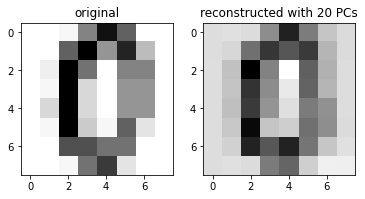

In [95]:
q = 20 # number of principal components to use
index = 10 # the index of the digit that we want to reconstruct 

digit_orig = digits_images[index,:] # original digit
digit_rec = Z[index,:q] @ A[:,:q].T        # reconstructed digit

# We can plot them side by side 
fig, axs = plt.subplots(1,2, figsize=(6, 3))
axs[0].imshow(digit_orig.reshape(8,8), cmap='Greys')
axs[0].set_title('original')
axs[1].imshow(digit_rec.reshape(8,8), cmap='Greys')
axs[1].set_title('reconstructed with ' + str(q) + ' PCs')
plt.show()

How does this work? In the canonical basis, the image is the sum of some weights multiplied by the canonical basis:
\begin{equation}
    \mathbf{x} = \sum_{i=1}^{m} w_i \mathbf{b}_i
\end{equation}

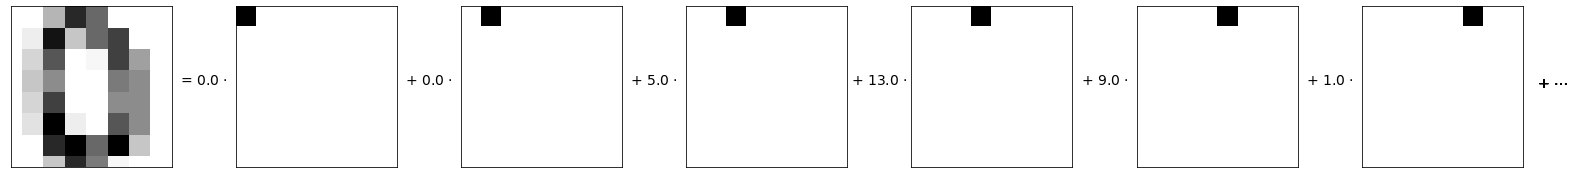

In [96]:
index = 0
digit = digits_images[index,:] 

B = np.eye(64) # The canonical basis is just the identity matrix
n_basis = 6

# Plotting function
fig, axs = plt.subplots(1, (n_basis+1), figsize=((n_basis+1)*3, 3))
fig.set_facecolor('white')
axs[0].imshow(digit.reshape(8,8), cmap='Greys')
axs[0].set_ylim(0,7.5)
axs[0].set_xlim(0,7.5)
   
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(n_basis):
    axs[i+1].imshow(B[:,i].reshape(8,8), cmap='Greys')
    axs[i+1].yaxis.set_label_coords(-0.2,0.5)
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    if i == 0:
        axs[i+1].set_ylabel(f'= {digit[i]} $\cdot$', rotation=0, fontsize=14)
    else:
        axs[i+1].set_ylabel(f'+ {digit[i]} $\cdot$', rotation=0, fontsize=14)

    
    axs[-1].text(8, 3.5, ' + $\cdots$', fontsize=14)

fig.subplots_adjust(left=0, right=1, bottom=0., top=1, wspace=0.4)
plt.show()

Obviously, we cannot truncate the canonical basis without loosing important information.

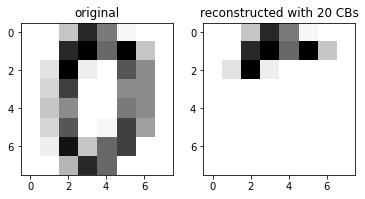

In [110]:
q = 20 # number of principal components to use
index = 0 # the index of the digit that we want to reconstruct 

digit_orig = digits_images[index,:] # original digit
digit_rec = digits_images[index,:q] @ B[:,:q].T        # reconstructed digit

# We can plot them side by side 
fig, axs = plt.subplots(1,2, figsize=(6, 3))
axs[0].imshow(digit_orig.reshape(8,8), cmap='Greys')
axs[0].set_title('original')
axs[1].imshow(digit_rec.reshape(8,8), cmap='Greys')
axs[1].set_title('reconstructed with ' + str(q) + ' CBs')
plt.show()

Instead, with PCA we find a new basis (A) such that:

\begin{equation}
    \mathbf{x} = \sum_{i=1}^{m} z_i \mathbf{a}_i
\end{equation}

Since PCA stores the information in the first few modes, we can use only few of them to reconstruct the dataset.

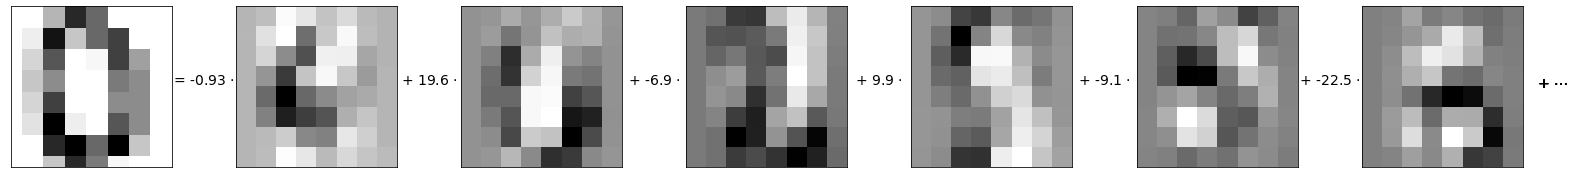

In [108]:
index = 0
digit = digits_images[index,:] 

n_basis = 6
fig, axs = plt.subplots(1, (n_basis+1), figsize=((n_basis+1)*3, 3))
fig.set_facecolor('white')
axs[0].imshow(digit.reshape(8,8), cmap='Greys')
axs[0].set_ylim(0,7.5)
axs[0].set_xlim(0,7.5)
   
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(n_basis):
    axs[i+1].imshow(A[:,i].reshape(8,8), cmap='Greys')
    axs[i+1].yaxis.set_label_coords(-0.2,0.5)
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
    if i == 0:
        axs[i+1].set_ylabel(f'= {Z[index, i]:.2f} $\cdot$', rotation=0, fontsize=14)
    else:
        axs[i+1].set_ylabel(f'+ {Z[index, i]:.1f} $\cdot$', rotation=0, fontsize=14)

    
    axs[-1].text(8, 3.5, ' + $\cdots$', fontsize=14)

fig.subplots_adjust(left=0, right=1, bottom=0., top=1, wspace=0.4)
plt.show()

Finally, we can show how the PC scores can be used to cluster the data by plotting the first two vectors of the PC scores (Z).

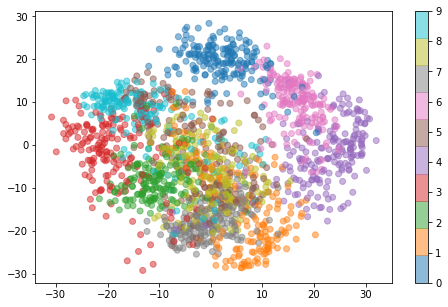

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1], c=digits_labels, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
fig.colorbar(im)
plt.show()

We can show off and do a 3D plot of the first 3 PC scores vectors.

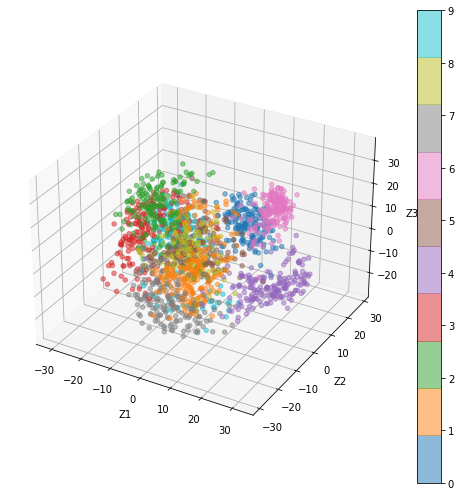

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=digits_labels, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
fig.colorbar(im)
fig.tight_layout()
plt.show()